## Импортируем необходимые библиотеки

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Подготовка данных



In [2]:
# Загрузка данных
images = np.load("data/images.npy")
labels = np.load("data/labels.npy")

In [3]:
images.shape

(20000, 48, 48, 3)

In [4]:
labels.shape

(20000,)

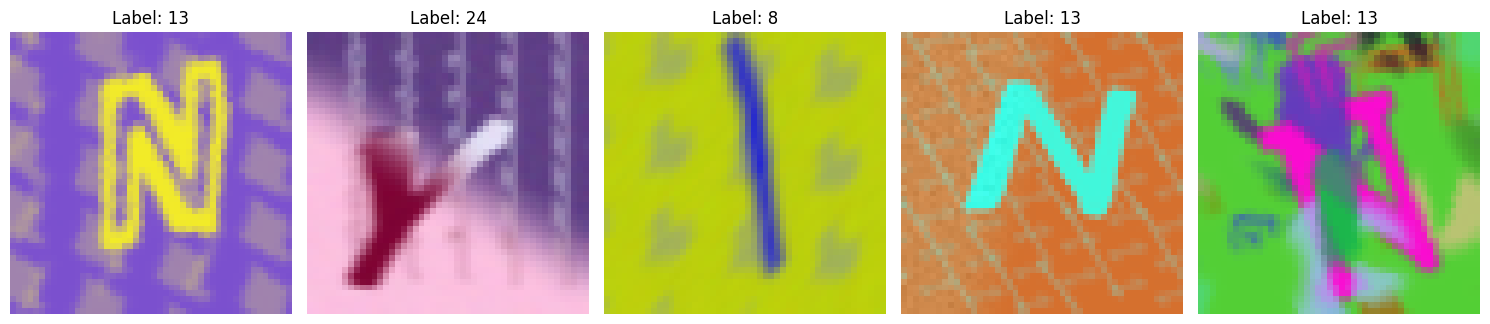

In [5]:
# Визуализация первых 5 изображений
num_images_to_show = 5  
plt.figure(figsize=(15, 5))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(images[i], cmap='gray' if images[i].ndim == 2 else None)  
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Нормализация 
images = images / 255.0

In [7]:
# One-hot кодирование меток (26 классов)
labels = tf.keras.utils.to_categorical(labels, num_classes=26)

In [8]:
# Разделение на train/val (80/20)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

## Модель

In [9]:
# Определение модели
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(26, activation='softmax')
])

2025-06-05 09:53:13.710296: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
# Компиляция модели с использованием планировщика обучения
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Вывод структуры модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,219,674 (4.65 MB)

 Trainable params: 1,218,778 (4.65 MB)

 Non-trainable params: 896 (3.50 KB)

In [14]:
# Сохранение графика модели
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Обучение 

In [15]:
# Определение EarlyStopping с улучшениями
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Мониторинг валидационной точности
    patience=10,             # Увеличение patience до 10
    restore_best_weights=True # Восстановление лучших весов
)

In [16]:
# Обучение модели с использованием EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]  # Добавление callback в fit
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 101s 199ms/step - accuracy: 0.0473 - loss: 3.4568 - val_accuracy: 0.0665 - val_loss: 3.1672
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 96s 192ms/step - accuracy: 0.1262 - loss: 2.9881 - val_accuracy: 0.4397 - val_loss: 1.7954
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 99s 197ms/step - accuracy: 0.5224 - loss: 1.5229 - val_accuracy: 0.7025 - val_loss: 0.9652
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 96s 193ms/step - accuracy: 0.7369 - loss: 0.8521 - val_accuracy: 0.7922 - val_loss: 0.6963
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 101s 202ms/step - accuracy: 0.8082 - loss: 0.6115 - val_accuracy: 0.8457 - val_loss: 0.5141
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 200ms/step - accuracy: 0.8713 - loss: 0.4286 - val_accuracy: 0.8522 - val_loss: 0.4800
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.8909 - loss: 0.3451 - val_accuracy: 0.8687 - val_loss: 0.4334
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 102s 205ms/step - accuracy: 0.9148 - los

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0')])

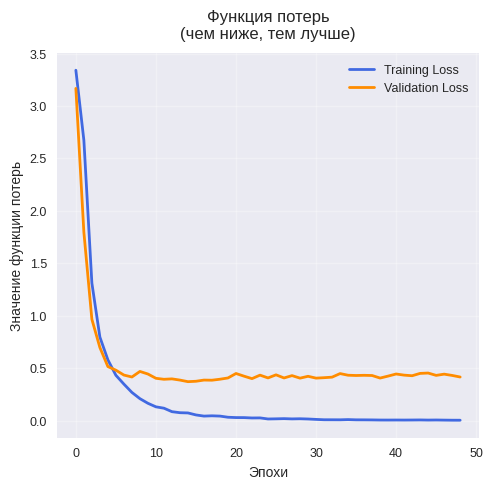

In [22]:
plt.figure(figsize=(12, 5))
plt.style.use('seaborn-v0_8')  # Используем современное название стиля seaborn

# Функция потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, color='royalblue')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='darkorange')
plt.title('Функция потерь\n(чем ниже, тем лучше)', fontsize=12, pad=10)
plt.xlabel('Эпохи', fontsize=10)
plt.ylabel('Значение функции потерь', fontsize=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

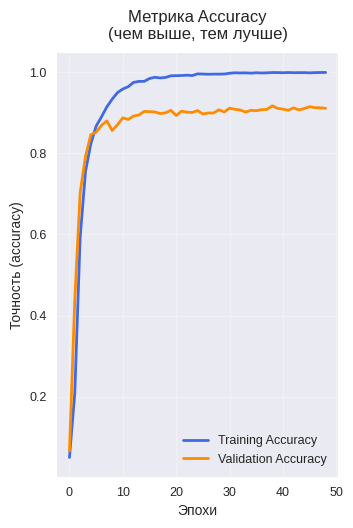

In [23]:
# Метрика Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='royalblue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='darkorange')
plt.title('Метрика Accuracy\n(чем выше, тем лучше)', fontsize=12, pad=10)
plt.xlabel('Эпохи', fontsize=10)
plt.ylabel('Точность (accuracy)', fontsize=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

In [25]:
images_sub = np.load("data/images_sub.npy")
images_sub = images_sub / 255.0
# Предсказания
predictions = model.predict(images_sub)
predicted_classes = predictions.argmax(axis=1)

   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:46 68ms/step

2025-06-05 16:10:23.556792: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1382400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step


In [26]:
# Создание файла ответов (submission)
submission = pd.DataFrame({
    'Id': range(len(predicted_classes)),
    'Category': predicted_classes
})
submission.to_csv('data/submission.csv', index=False)